In [80]:
dataset = 'dataset.csv'

In [81]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


### Import Modules

In [82]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [83]:
data  = pd.read_csv(dataset)

In [84]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [85]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [87]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [88]:
data.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

### Data Preprocessing

In [89]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

string_columns = list(data.dtypes[data.dtypes == 'object'].index)

for col in string_columns:
    data[col] = data[col].str.lower().str.replace(' ', '_')

In [90]:
data.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,graduate


In [91]:
data.rename(columns = {'nacionality':'nationality', 'age_at_enrollment':'age'}, inplace = True)

In [92]:
data['target'].unique()

array(['dropout', 'graduate', 'enrolled'], dtype=object)

In [93]:
data['target'] = data['target'].map({
    'dropout':0,
    'enrolled':1,
    'graduate':2
})

In [94]:
data['target'].unique()

array([0, 2, 1])

### Feature selection

In [95]:
correlation_matrix = np.corrcoef(data)

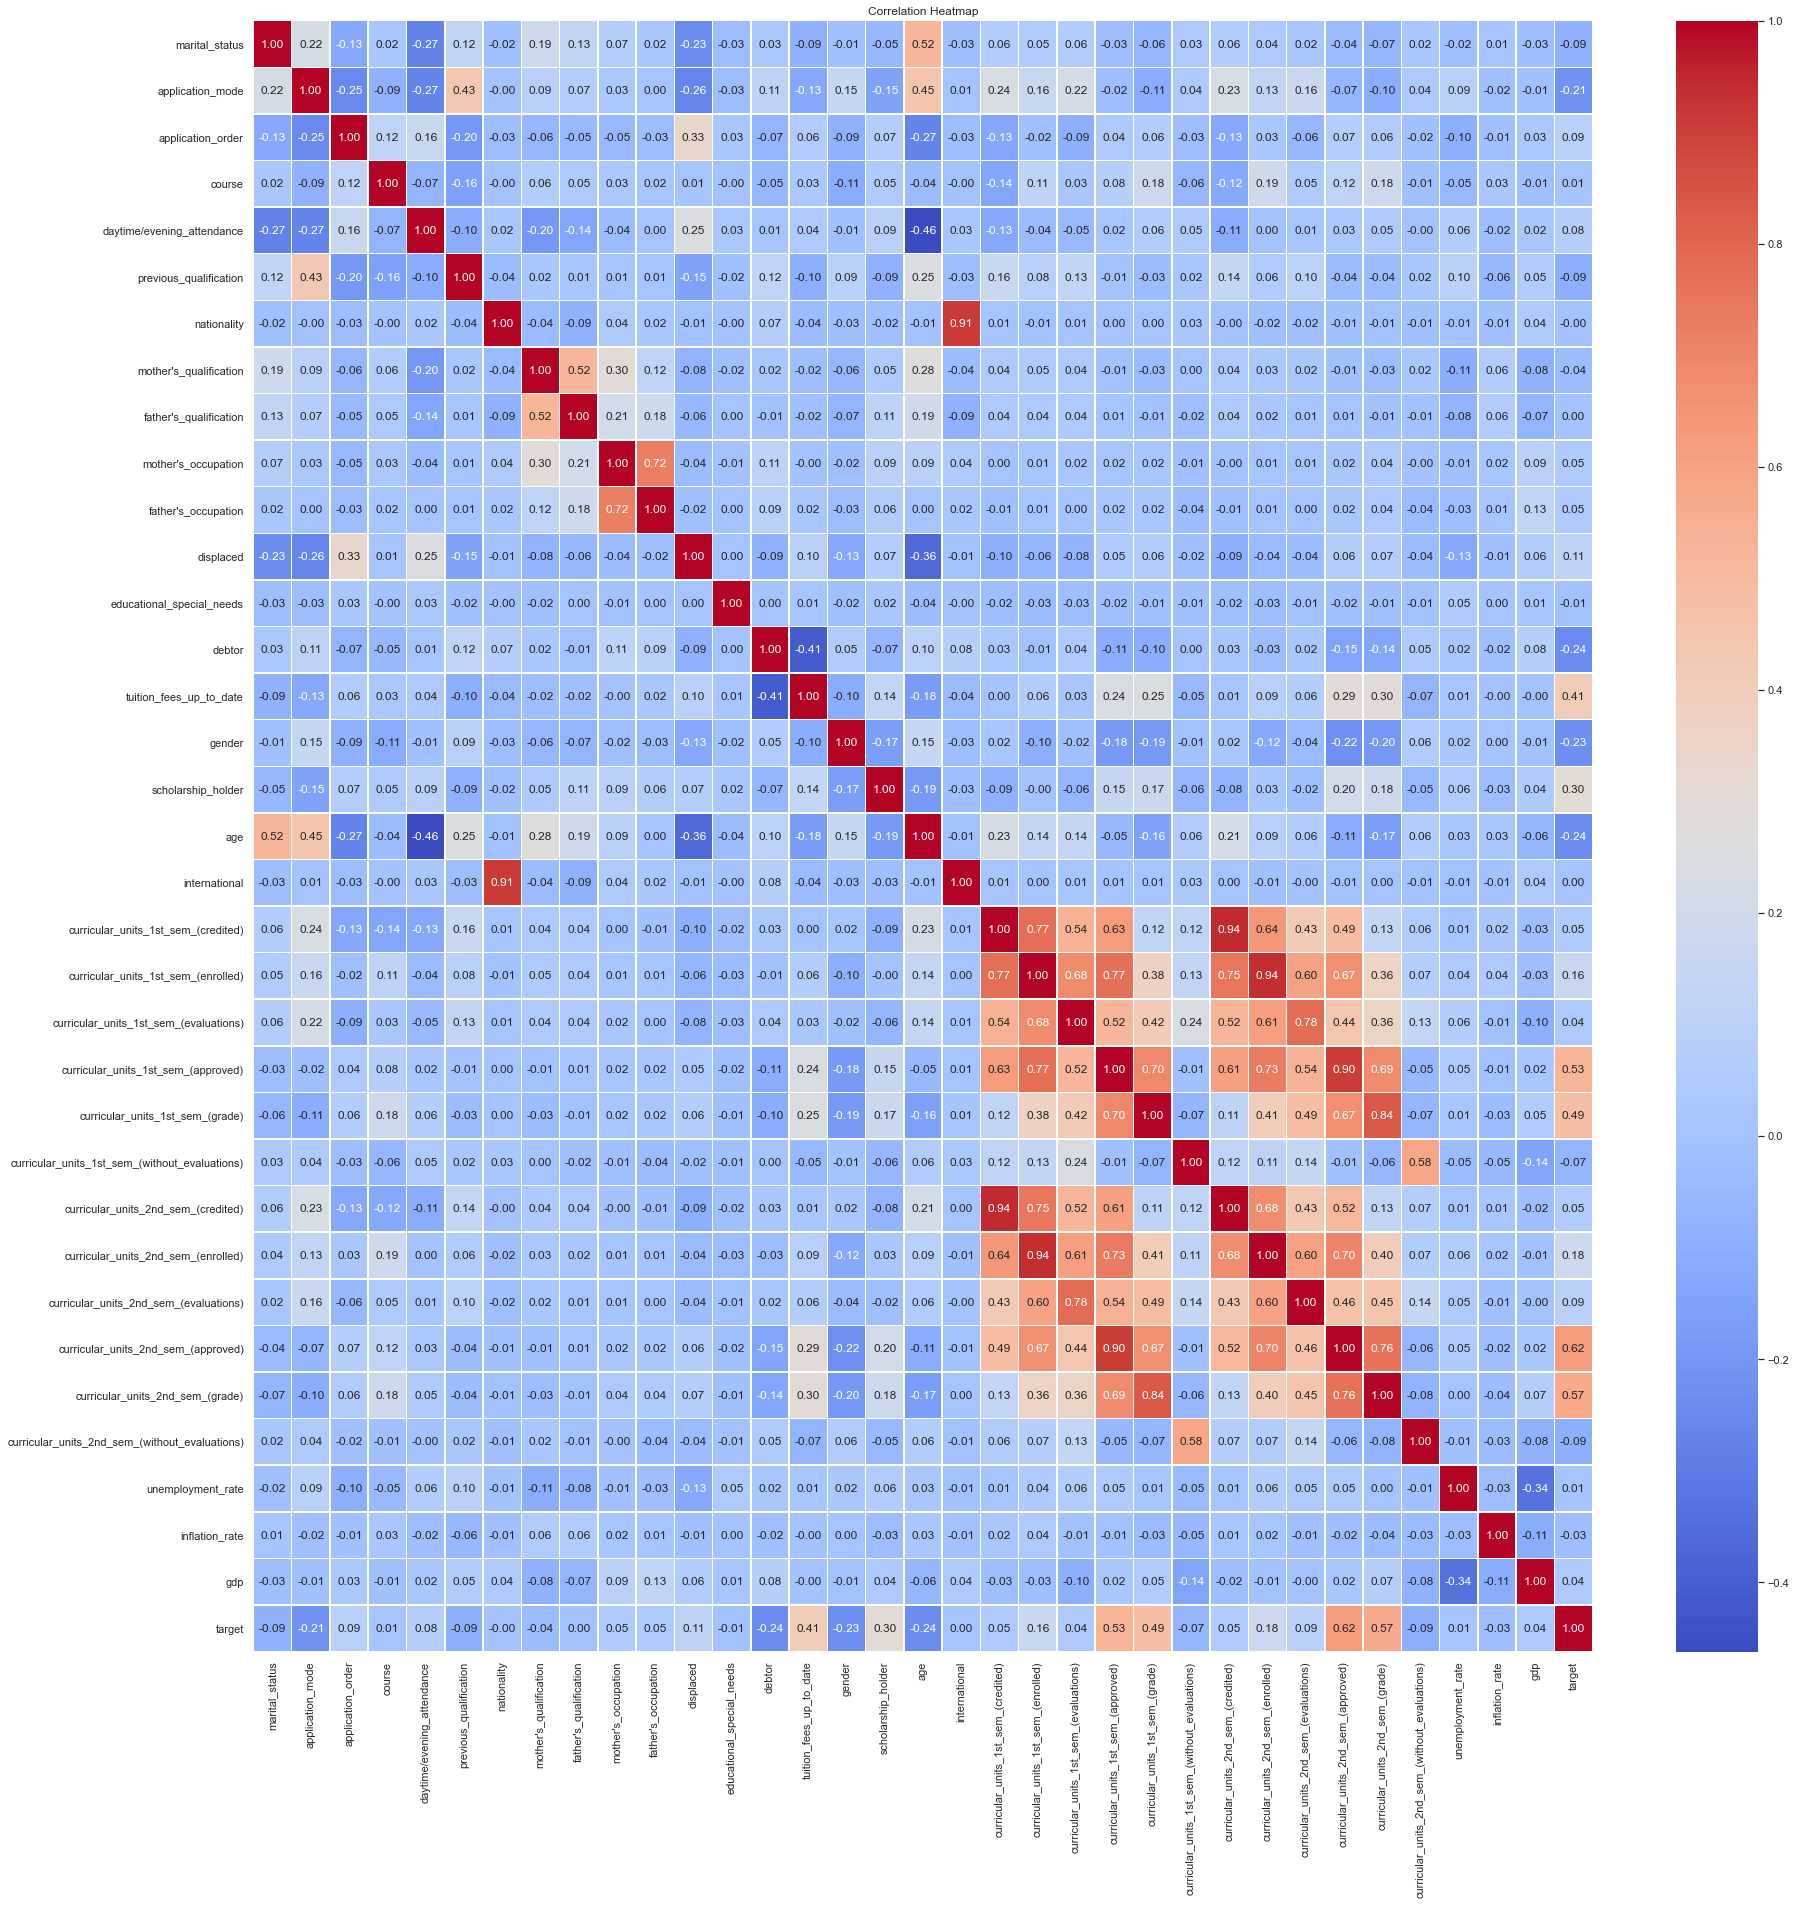

In [96]:
sns.set(style="white")
plt.figure(figsize=(30, 30)) 

sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True,linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [97]:
data.corr()['target'].sort_values(ascending=True)

age                                              -0.243438
debtor                                           -0.240999
gender                                           -0.229270
application_mode                                 -0.212025
curricular_units_2nd_sem_(without_evaluations)   -0.094028
previous_qualification                           -0.091365
marital_status                                   -0.089804
curricular_units_1st_sem_(without_evaluations)   -0.068702
mother's_qualification                           -0.038346
inflation_rate                                   -0.026874
educational_special_needs                        -0.007353
nationality                                      -0.004740
father's_qualification                            0.000329
international                                     0.003934
course                                            0.007841
unemployment_rate                                 0.008627
gdp                                               0.0441

After observing the correlation scores with the target variable 'target', following columns will be dropped due to their low correlation scores: 
- Nationality
- Mother's qualification
- Father's qualification
- Educational special needs
- International
- Curricular units 1st sem (without evaluations)
- Unemployment rate
- Inflation rate

In [98]:
data_copy = data.copy()
data_copy = data_copy.drop(columns=['nationality', 
                                  'mother\'s_qualification', 
                                  'father\'s_qualification', 
                                  'educational_special_needs', 
                                  'international', 
                                  'curricular_units_1st_sem_(without_evaluations)',
                                  'unemployment_rate', 
                                  'inflation_rate'], axis=1)
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime/evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   mother's_occupation                             4424 non-null   int64  
 7   father's_occupation                             4424 non-null   int64  
 8   displaced                                       4424 non-null   int64  
 9   debtor                                   

### Exploratory Data Analysis

In [99]:
data_copy['target'].value_counts()

2    2209
0    1421
1     794
Name: target, dtype: int64

In [100]:
x = data_copy['target'].value_counts().index
y = data_copy['target'].value_counts().values

df = pd.DataFrame({
    'target': x,
    'Count' : y
})

#create pie chart
fig = px.pie(df,
             names ='target', 
             values ='Count',
            title='How many dropouts, enrolled & graduates are there in "target"')

fig.update_traces(labels=['graduate','dropout','enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

/Users/thawe/opt/anaconda3/lib/python3.8/site-packages/numpy/core/numeric.py:2449: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



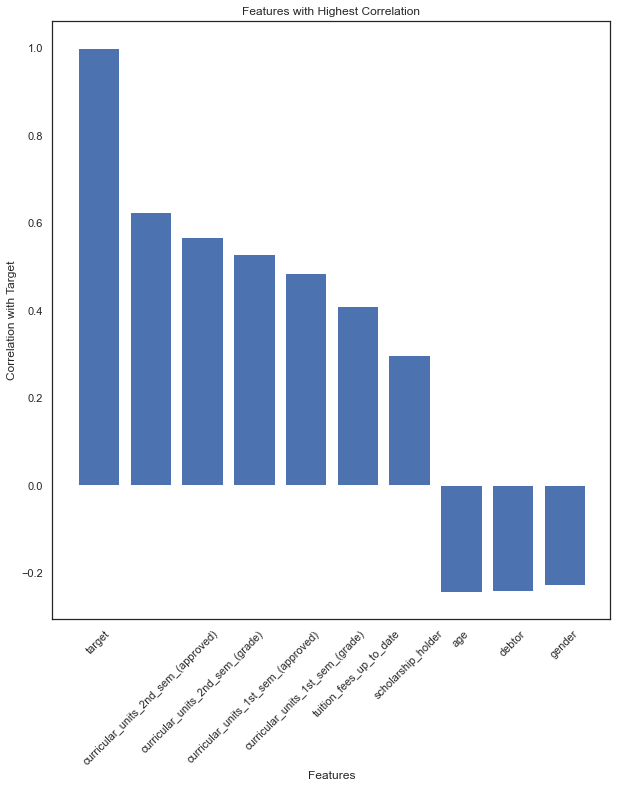

In [101]:
correlations = data.corr()['target']
features = correlations.abs().nlargest(10).index
corr_values = correlations[features]

plt.figure(figsize=(10, 11))
plt.bar(features, corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Features with Highest Correlation')
plt.xticks(rotation=45)
plt.show()

In [102]:
px.histogram(data_copy['age'], title = 'Age',
             x='age',
             color_discrete_sequence=['lightgreen'])

### Train test split

In [103]:
X = data_copy.drop('target', axis=1)
y = data_copy['target']

In [104]:
X.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'mother's_occupation', 'father's_occupation', 'displaced', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)', 'gdp'],
      dtype='object')

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### One Hot Encoding

In [106]:
from sklearn.feature_extraction import DictVectorizer

In [107]:
train_dict = X_train.to_dict(orient='records')

In [108]:
train_dict[0]

{'marital_status': 1,
 'application_mode': 12,
 'application_order': 1,
 'course': 4,
 'daytime/evening_attendance': 1,
 'previous_qualification': 1,
 "mother's_occupation": 6,
 "father's_occupation": 6,
 'displaced': 0,
 'debtor': 1,
 'tuition_fees_up_to_date': 1,
 'gender': 0,
 'scholarship_holder': 0,
 'age': 34,
 'curricular_units_1st_sem_(credited)': 0,
 'curricular_units_1st_sem_(enrolled)': 6,
 'curricular_units_1st_sem_(evaluations)': 10,
 'curricular_units_1st_sem_(approved)': 5,
 'curricular_units_1st_sem_(grade)': 13.833333333333334,
 'curricular_units_2nd_sem_(credited)': 0,
 'curricular_units_2nd_sem_(enrolled)': 6,
 'curricular_units_2nd_sem_(evaluations)': 13,
 'curricular_units_2nd_sem_(approved)': 5,
 'curricular_units_2nd_sem_(grade)': 12.5,
 'curricular_units_2nd_sem_(without_evaluations)': 0,
 'gdp': -0.92}

In [109]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [110]:
X_train = dv.fit_transform(train_dict)

In [111]:
X_train.shape

(3539, 26)

In [112]:
dv.get_feature_names()

['age',
 'application_mode',
 'application_order',
 'course',
 'curricular_units_1st_sem_(approved)',
 'curricular_units_1st_sem_(credited)',
 'curricular_units_1st_sem_(enrolled)',
 'curricular_units_1st_sem_(evaluations)',
 'curricular_units_1st_sem_(grade)',
 'curricular_units_2nd_sem_(approved)',
 'curricular_units_2nd_sem_(credited)',
 'curricular_units_2nd_sem_(enrolled)',
 'curricular_units_2nd_sem_(evaluations)',
 'curricular_units_2nd_sem_(grade)',
 'curricular_units_2nd_sem_(without_evaluations)',
 'daytime/evening_attendance',
 'debtor',
 'displaced',
 "father's_occupation",
 'gdp',
 'gender',
 'marital_status',
 "mother's_occupation",
 'previous_qualification',
 'scholarship_holder',
 'tuition_fees_up_to_date']

### Model Creation

In [113]:
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=2)
log = LogisticRegression(solver='lbfgs', max_iter=1000,random_state=42)
svm = svm.SVC(kernel='linear',probability=True)

In [114]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [115]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

In [116]:
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [117]:
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

### Predictions

In [118]:
y_pred_dt = dt.predict(X_test)
accuracy_score_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)
print("Decision Tree Accuracy :",accuracy_score_dt,"%")

Decision Tree Accuracy : 18.31 %


In [119]:
y_pred_rf = rf.predict(X_test)
accuracy_score_rf = round(accuracy_score(y_test,y_pred_rf)*100,2)
print("Random Forest Accuracy :",accuracy_score_rf,"%")

Random Forest Accuracy : 31.64 %


In [120]:
y_pred_log = log.predict(X_test)
accuracy_score_log = round(accuracy_score(y_test,y_pred_log)*100,2)
print("Logistic Regression Accuracy :",accuracy_score_log,"%")

Logistic Regression Accuracy : 26.67 %


In [121]:
y_pred_svm = svm.predict(X_test)
accuracy_score_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)
print("SVM Accuracy :",accuracy_score_svm,"%")

SVM Accuracy : 27.8 %


In [122]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest','Logistic Regression','Support Vector Machines'],
    'Model Score': [accuracy_score_dt, accuracy_score_rf, accuracy_score_log, accuracy_score_svm]})
models

,Model,Model Score
0,Decision Tree,18.31
1,Random Forest,31.64
2,Logistic Regression,26.67
3,Support Vector Machines,27.80


Random Forest Classification has the best accuracy score among other models.

### Using the model

In [123]:
pd.set_option('display.max_columns', None)
X.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,mother's_occupation,father's_occupation,displaced,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),gdp
0,1,8,5,2,1,1,6,10,1,0,1,1,0,20,0,0,0,0,0.000000,0,0,0,0,0.000000,0,1.74
1,1,6,1,11,1,1,4,4,1,0,0,1,0,19,0,6,6,6,14.000000,0,6,6,6,13.666667,0,0.79
2,1,1,5,5,1,1,10,10,1,0,0,1,0,19,0,6,0,0,0.000000,0,6,0,0,0.000000,0,1.74
3,1,8,2,15,1,1,6,4,1,0,1,0,0,20,0,6,8,6,13.428571,0,6,10,5,12.400000,0,-3.12
4,2,12,1,3,0,1,10,10,0,0,1,0,0,45,0,6,9,5,12.333333,0,6,6,6,13.000000,0,0.79


In [124]:
student={'marital_status': 2, 
           'application_mode': 6, 
           'application_order': 5, 
           'course': 12,
           'daytime/evening_attendance': 1, 
           'previous_qualification': 1,
           'mother\'s_occupation': 4, 
           'father\'s_occupation': 2, 
           'displaced': 1, 
           'debtor': 0,
           'tuition_fees_up_to_date': 1 , 
           'gender': 0, 
           'scholarship_holder': 0, 
           'age': 30,
           'curricular_units_1st_sem_(credited)': 0,
           'curricular_units_1st_sem_(enrolled)': 6,
           'curricular_units_1st_sem_(evaluations)': 9,
           'curricular_units_1st_sem_(approved)': 6,
           'curricular_units_1st_sem_(grade)': 20,
           'curricular_units_2nd_sem_(credited)': 0,
           'curricular_units_2nd_sem_(enrolled)': 6,
           'curricular_units_2nd_sem_(evaluations)': 10,
           'curricular_units_2nd_sem_(approved)': 5,
           'curricular_units_2nd_sem_(grade)': 10,
           'curricular_units_2nd_sem_(without_evaluations)': 0, 
           'gdp': 1.74 
          }

In [125]:
model = RandomForestClassifier(random_state=2)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=2)

In [126]:
X = dv.transform([student])
y_pred = model.predict_proba(X)[0, 1]
result = y_pred * 100

print("The student's dropout rate is :",result,"%")

The student's dropout rate is : 39.0 %


### Parameter Tuning

In [127]:
from sklearn.model_selection import GridSearchCV

In [141]:
param_grid = {
    'n_estimators': [30, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [142]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 50, 100, 200]})

In [143]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [144]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict_proba(X)[0, 1]
result = int(y_pred * 100)

In [145]:
print("Best Hyperparameters:", best_params)
print("Accuracy:", result, "%")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 37 %


### Save the model

In [146]:
import pickle

In [147]:
output_file = f'model.bin'

In [148]:
output_file

'model.bin'

In [150]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, best_model), f_out)
f_out.close()

In [151]:
with open('dv.pkl', 'wb') as f_out:
    pickle.dump((dv), f_out)

In [138]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((best_model), f_out)

### Load the model

In [139]:
input_file = 'model.bin'

In [140]:
with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

ValueError: too many values to unpack (expected 2)

In [ ]:
with open('dv.pkl', 'rb') as f_in: 
    dv = pickle.load(f_in)

In [ ]:
model

In [ ]:
student={'marital_status': 2, 
           'application_mode': 6, 
           'application_order': 5, 
           'course': 12,
           'daytime/evening_attendance': 1, 
           'previous_qualification': 1,
           'mother\'s_occupation': 4, 
           'father\'s_occupation': 2, 
           'displaced': 1, 
           'debtor': 0,
           'tuition_fees_up_to_date': 1 , 
           'gender': 0, 
           'scholarship_holder': 0, 
           'age': 30,
           'curricular_units_1st_sem_(credited)': 0,
           'curricular_units_1st_sem_(enrolled)': 6,
           'curricular_units_1st_sem_(evaluations)': 9,
           'curricular_units_1st_sem_(approved)': 6,
           'curricular_units_1st_sem_(grade)': 20,
           'curricular_units_2nd_sem_(credited)': 0,
           'curricular_units_2nd_sem_(enrolled)': 6,
           'curricular_units_2nd_sem_(evaluations)': 10,
           'curricular_units_2nd_sem_(approved)': 5,
           'curricular_units_2nd_sem_(grade)': 10,
           'curricular_units_2nd_sem_(without_evaluations)': 0, 
           'gdp': 1.74 
          }

In [ ]:
X = dv.transform([student])

In [ ]:
y_pred = model.predict_proba(X)[0, 1]

In [ ]:
print('input:', student)
print('output:', y_pred)